# <font color="#008080">HW # 1: Exploratory Data Analysis and visualization (EDA&V)</font>

#### Profesor: EMILIO BAROCIO ESPEJO
#### Alumno: Ortega Camargo Fernando
#### GitHub Tarea1:
###### https://github.com/Fortega95/MEM_MCD/blob/main/Tarea1_Fernando_MEM.ipynb  
Fecha: 30-01-24

**Objective:** A descriptive statistical is used in this HW. Graphical representation from data base are obtained to carry out an EDAV&V.

**Instructions:**
1. Download the dataset from https://www.kaggle.com/uciml/iris?select=Iris.csv
2. Plot the iris dataset: Boxplot, Histogram Plot, Violin Plot, Scatter Plot, Andrews
curve and proposed one multivariate graphical representation.
3. Consider the Gestalt principles of pattern recognition and pre-attentive processing
data to improve the visualization data.
4. Jupiter notebook and R tools are recommended to carry out this HW. But, you can
use other package or environment to solve this assignment.

**Deliverable:**
The REPORT should contain: Title, name, introduction, data set description, analysis of plots, a wide technical discussion, conclusions and references. WORD, PDF or COLAB file is acceptable.

##  <font color="#008080">Introducción</font>


La colección de datos iris constituye una valiosa fuente de información que ha sido ampliamente empleada en los ámbitos de la estadística y el aprendizaje automático.
Esta base de datos fue creada en 1936 por el estadístico británico y biólogo Ronald Fisher y su principal aplicación radica en la clasificación de distintas especies de plantas iris, las cuales se dividen en tres tipos, Setosa, versicolor y Virginia.
Las plantas iris son un género de plantas con flores que se caracterizan por tener flores vistosas con tres pétalos y tres sépalos.Hay diversas especies de iris, y su apariencia puede variar, pero comúnmente tienen hojas largas y verticales. 

Esta base de datos proporciona medidas detalladas de longitud y ancho tanto del pétalo como del sépalo, permitiendo así analizar la proporción de cada planta, incluye tres especies de iris con 50 muestras cada una (150 en total), así como algunas propiedades sobre cada flor. 


Las columnas en este conjunto de datos son:

* Id
* Longitud del Sépalo (cm)
* Ancho del Sépalo (cm)
* Longitud del Pétalo (cm)
* Ancho del Pétalo (cm)
* Especie


Definiciones  
**Sepalo:** El sépalo es una parte de la flor que forma el cáliz, la capa externa del perianto. Funciona para proteger el botón floral y, en algunas plantas, participa en la polinización. Puede tener diferentes colores y formas, contribuyendo a la estética de la flor. Su función principal es proporcionar protección y soporte estructural.  
**Petalo:** Los pétalos son las partes coloridas de una flor que forman la corola. Tienen la función de atraer polinizadores con colores y fragancias, y también pueden ofrecer protección a las partes reproductoras de la flor durante su desarrollo.

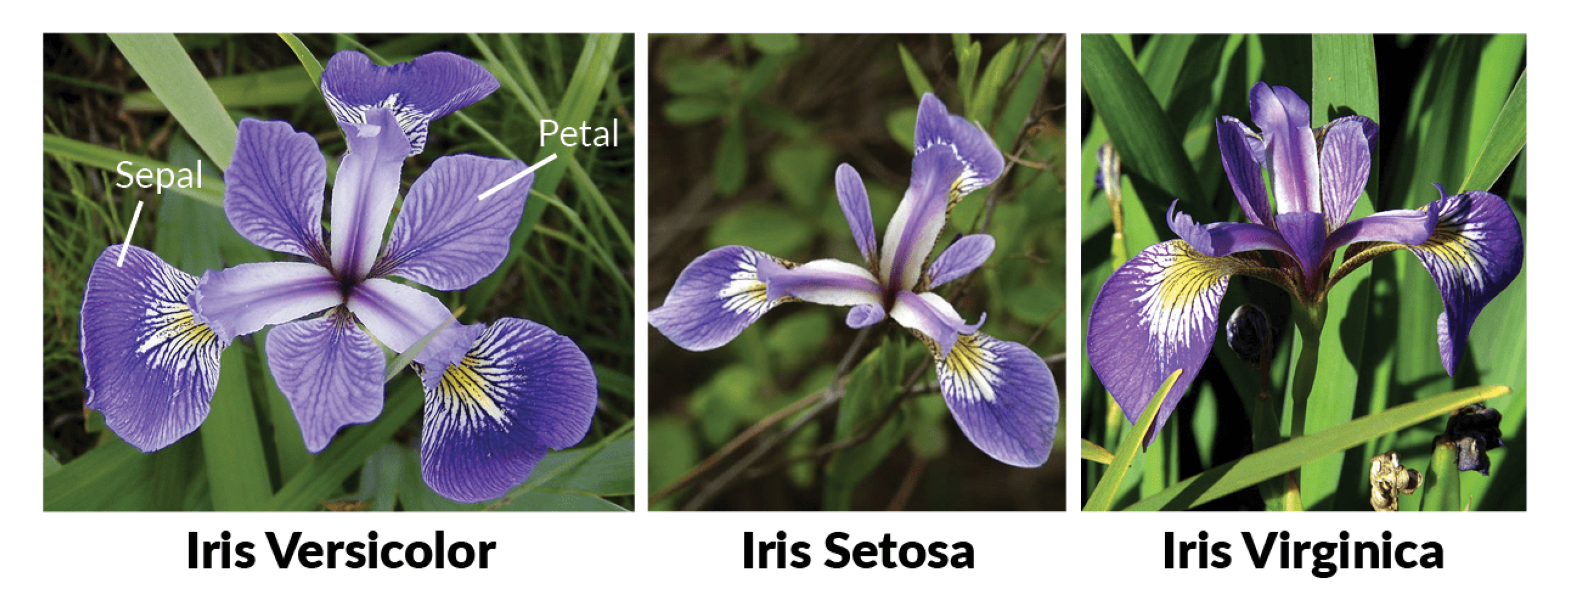

In [2]:
plt.figure(figsize=(20,10))
plt.imshow(mpimg.imread("iris.especie.png"))
plt.axis('off')  # Desactiva los ejes
plt.grid(False)  # Desactiva la cuadrícula

####  <font color="#008080">Descripción de la base</font>

Como mencionamos anteriormente el data set incluye informacion de una muestra de 150 flores "iris" segmentadas por especie y detallando las siguientes medidas númericas: Ancho del sepalo, Largo de sepalo, Ancho de petalo y longitud del petalo.  
Carguemos el dataset y empecemos con la descripción de la base.

In [1]:
## importamos librerias
import os                                 #Liberia de manejo de sistema operativo

import pandas as pd                       #librerias de manejo ed arrays y dataframes
import numpy as np 
                                          # librerias de graficación
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
import matplotlib.image as mpimg
warnings.filterwarnings("ignore")


sns.set()

Importamos la base de datos

In [3]:
iris=pd.read_csv("D://Maestria//git//MEM_MCD//Bases//Iris.csv")

####  <font color="#008080">Análisis rápido de estructura</font>

In [4]:
iris.head(5)   #vemos primeros renglones de la base

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
## datos generales de estructura

print(f"Dimension de la base iris: {iris.shape}")
print("###Columnas:")
print(list(iris.columns))

Dimension de la base iris: (150, 6)
###Columnas:
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [6]:
iris.info()   # informacion general de estructura, nulos, y tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.Id= iris.Id.astype("str")   # El id no representa un valor categorico ordinal, por lo que transformamos a STR para hacerlo categorico nominal

In [8]:
iris.describe(include="all")    #análisis estadístico rápido

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150,150.000000,150.000000,150.000000,150.000000,150
unique,150,NaN,NaN,NaN,NaN,3
top,1,NaN,NaN,NaN,NaN,Iris-setosa
freq,1,NaN,NaN,NaN,NaN,50
mean,NaN,5.843333,3.054000,3.758667,1.198667,NaN
std,NaN,0.828066,0.433594,1.764420,0.763161,NaN
min,NaN,4.300000,2.000000,1.000000,0.100000,NaN
25%,NaN,5.100000,2.800000,1.600000,0.300000,NaN
50%,NaN,5.800000,3.000000,4.350000,1.300000,NaN
75%,NaN,6.400000,3.300000,5.100000,1.800000,NaN


In [9]:
iris.Species.value_counts()   #validamos la cantidad de datos por categoría

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
iris.dtypes    #validamos el tipo de dato en python

Id                object
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

####  <font color="#008080">Resumen</font>

* El data set cuenta con 150 datos divididos en 3 subcategorias: setosa, versicolor y virginica con 50 datos dentro de cada categoría
* El data set esta dividido en 6 atributos, 4 numéricos flotantes (SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm) , un numérico entero (Id) el cual se convirtio a string y uno de tipo string (Specie)
* No se tienen valores nulos


# <font color="#008080">Análisis descriptivo: Gráficos principales</font>

####  <font color="grey">BoxPlot</font>

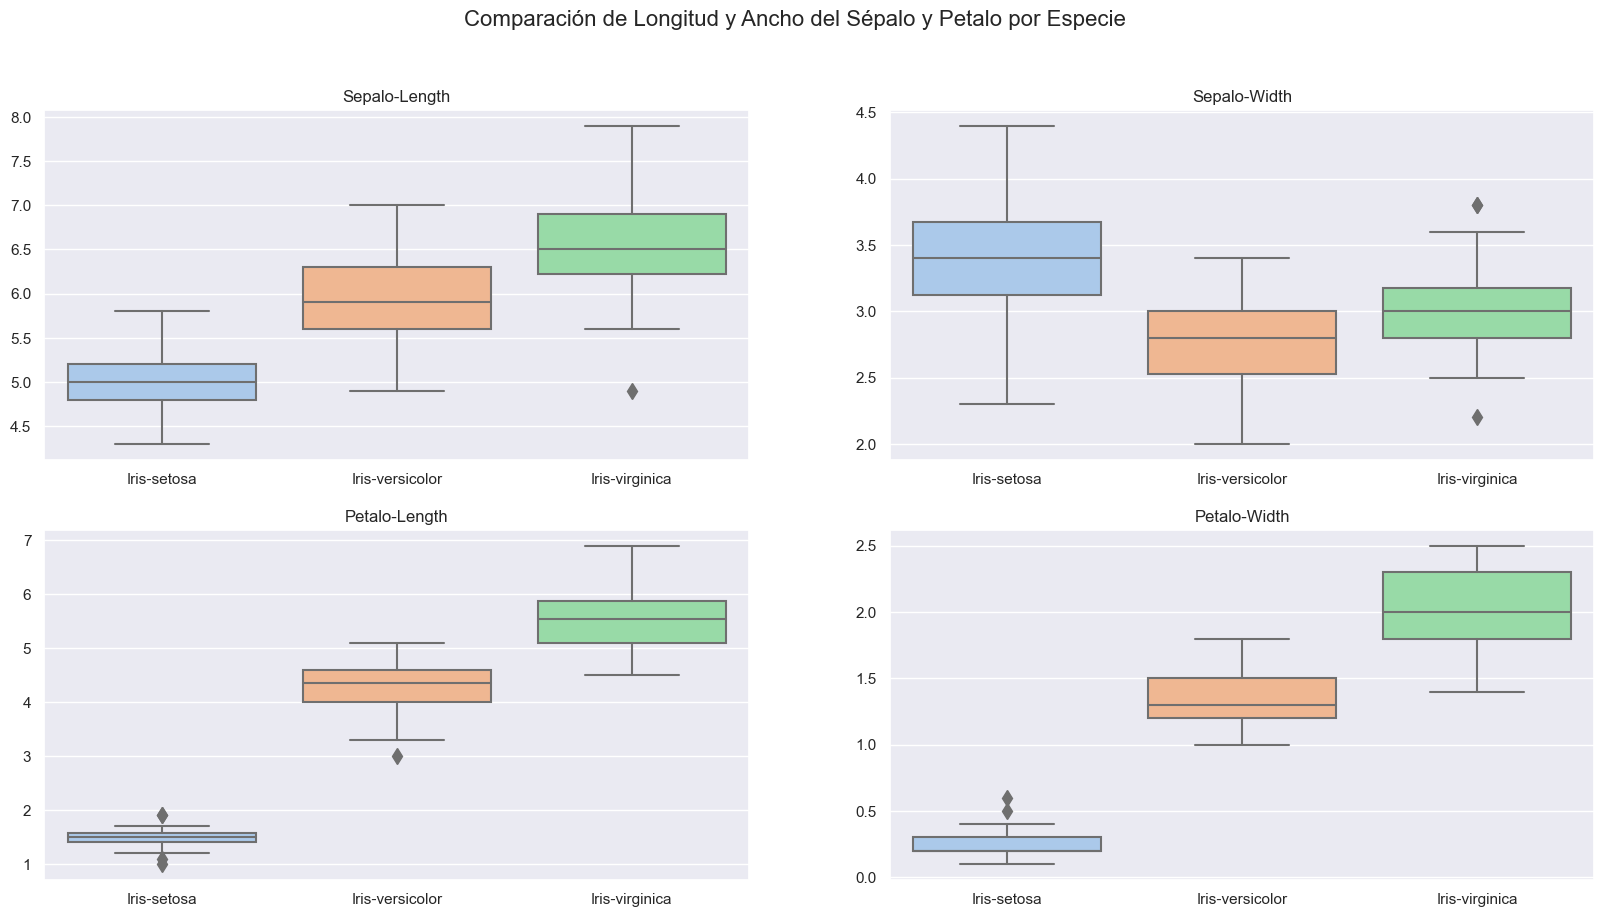

In [11]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))   #definimos el grid de gráficos asi como tamaño

# Boxplot 1
sns.boxplot(data=iris, x="Species", y="SepalLengthCm", palette="pastel",linewidth=1.5,fliersize=8, ax=axes[0, 0])
axes[0, 0].set_title('Sepalo-Length')
axes[0, 0].set_ylabel('')
axes[0, 0].set_xlabel('')

# Boxplot 2
sns.boxplot(data=iris, x="Species", y="SepalWidthCm", palette="pastel",linewidth=1.5, fliersize=8, ax=axes[0, 1])
axes[0, 1].set_title('Sepalo-Width')
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('')

# Boxplot 3
sns.boxplot(data=iris, x="Species", y="PetalLengthCm", palette="pastel",linewidth=1.5, fliersize=8, ax=axes[1, 0])
axes[1, 0].set_title('Petalo-Length')
axes[1, 0].set_ylabel('')
axes[1, 0].set_xlabel('')

# Boxplot 4
sns.boxplot(data=iris, x="Species", y="PetalWidthCm", palette="pastel",linewidth=1.5, fliersize=8, ax=axes[1, 1])
axes[1, 1].set_title('Petalo-Width')
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('')

# Agregaamos título al gráfico múltiple
fig.suptitle('Comparación de Longitud y Ancho del Sépalo y Petalo por Especie', fontsize=16)

plt.show()


El gráfico anterior fue segmentado por especie como valor categórico y subdividido en un grid que muestra por filas los petalos y los sepalos. Adicional a esto se divide con colores cada tipo de planta para diferenciar por gráfico pero para relacionar entre gráficos.
En el plot se presentan las distribuciones de las variables numéricas por categoria, con lo que podemos ver discrepancias claras entre grupos, asi como una alta variabilidad principalmente en las variables de sepalo.
Adicional a esto la variable de Petalo presenta mayor número de datos atipicos sobretodo en la especie de setosa. Finalmente podemos ver la diferencia entre escalas para las variables de longitud y ancho por lo que eventualmente una estandarización podria ayudar.

####  <font color="grey">Histográmas</font>

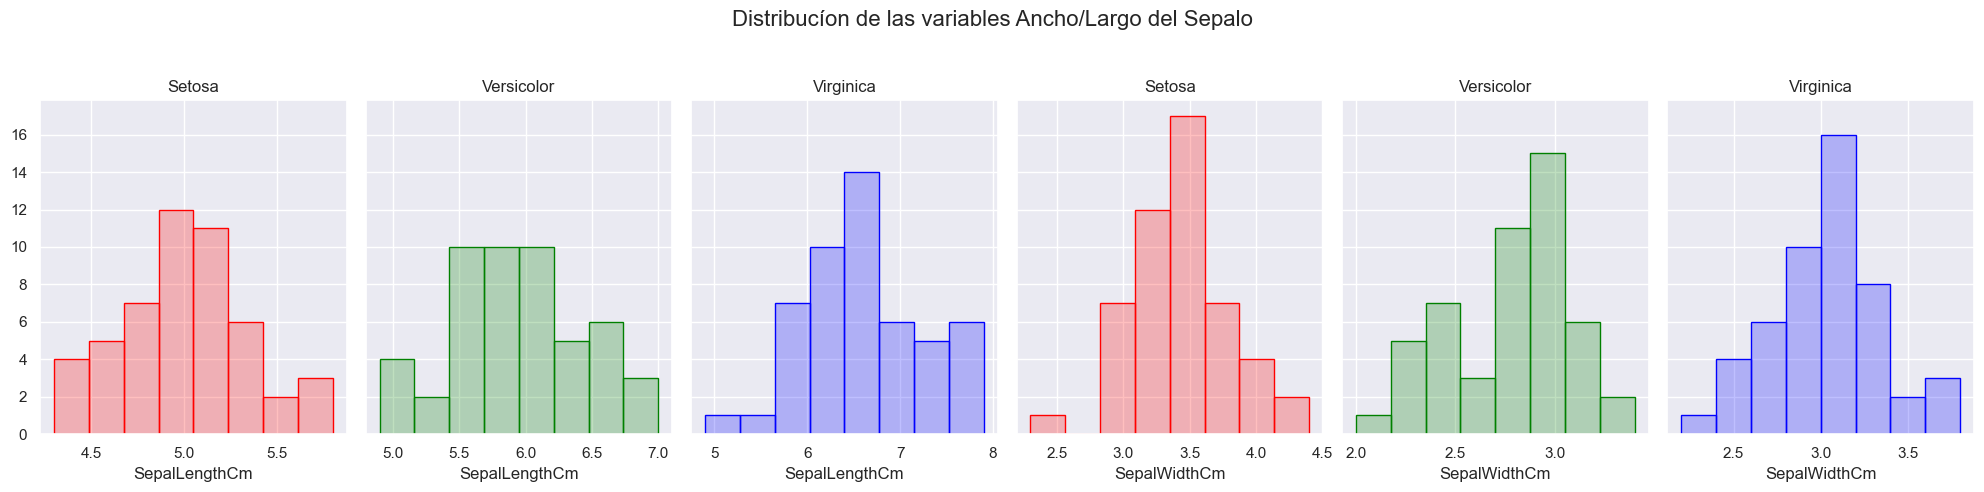

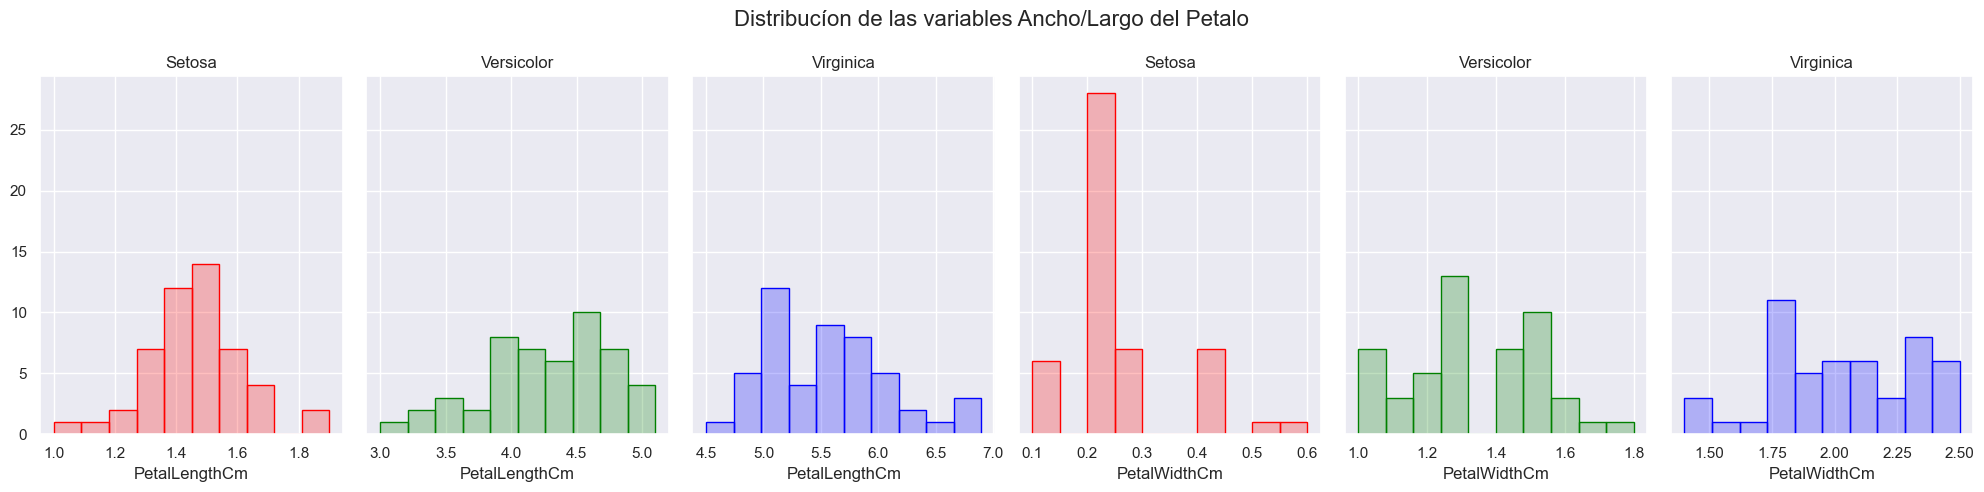

In [12]:

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 5),sharey=True)  #definimos el grid de gráficos asi como tamaño

# set de Histogramas 1
sns.histplot(data=iris[iris.Species=="Iris-setosa"],x="SepalLengthCm",bins=8,alpha=.25,color="red",ax=axes[ 0],edgecolor="red")
sns.histplot(data=iris[iris.Species=="Iris-versicolor"],x="SepalLengthCm",bins=8,alpha=.25,color="green",ax=axes[1],edgecolor="green")
sns.histplot(data=iris[iris.Species=="Iris-virginica"],x="SepalLengthCm",bins=8,alpha=.25,color="blue",ax=axes[2],edgecolor="blue")

axes[0].set_title('Setosa')
axes[1].set_title('Versicolor')
axes[2].set_title('Virginica')

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')



# set de Histogramas 2
sns.histplot(data=iris[iris.Species=="Iris-setosa"],x="SepalWidthCm",bins=8,alpha=.25,color="red",ax=axes[3],edgecolor="red")
sns.histplot(data=iris[iris.Species=="Iris-versicolor"],x="SepalWidthCm",bins=8,alpha=.25,color="green",ax=axes[4],edgecolor="green")
sns.histplot(data=iris[iris.Species=="Iris-virginica"],x="SepalWidthCm",bins=8,alpha=.25,color="blue",ax=axes[5],edgecolor="blue")

axes[3].set_title('Setosa')
axes[4].set_title('Versicolor')
axes[5].set_title('Virginica')

axes[3].set_ylabel('')
axes[4].set_ylabel('')
axes[5].set_ylabel('')

plt.tight_layout()


fig.suptitle('Distribucíon de las variables Ancho/Largo del Sepalo', fontsize=16)

plt.subplots_adjust(top=.8)

plt.show()


fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 5),sharey=True)

# set de Histogramas 3
sns.histplot(data=iris[iris.Species=="Iris-setosa"],x="PetalLengthCm",bins=10,alpha=.25,color="red",ax=axes[0],edgecolor="red")
sns.histplot(data=iris[iris.Species=="Iris-versicolor"],x="PetalLengthCm",bins=10,alpha=.25,color="green",ax=axes[1],edgecolor="green")
sns.histplot(data=iris[iris.Species=="Iris-virginica"],x="PetalLengthCm",bins=10,alpha=.25,color="blue",ax=axes[2],edgecolor="blue")

axes[0].set_title('Setosa')
axes[1].set_title('Versicolor')
axes[2].set_title('Virginica')

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

# set de Histogramas 4
sns.histplot(data=iris[iris.Species=="Iris-setosa"],x="PetalWidthCm",bins=10,alpha=.25,color="red",ax=axes[3],edgecolor="red")
sns.histplot(data=iris[iris.Species=="Iris-versicolor"],x="PetalWidthCm",bins=10,alpha=.25,color="green",ax=axes[4],edgecolor="green")
sns.histplot(data=iris[iris.Species=="Iris-virginica"],x="PetalWidthCm",bins=10,alpha=.25,color="blue",ax=axes[5],edgecolor="blue")

axes[3].set_title('Setosa')
axes[4].set_title('Versicolor')
axes[5].set_title('Virginica')

axes[3].set_ylabel('')
axes[4].set_ylabel('')
axes[5].set_ylabel('')

# Agregamos título al gráfico múltiple
fig.suptitle('Distribucíon de las variables Ancho/Largo del Petalo', fontsize=16)
plt.subplots_adjust(top=.8)

plt.tight_layout()

plt.show()

En este gráfico se opto por subdividir en dos grupos, petalo y sepalo por renglón y dentro de cada uno ver la distribucion de las variables numéricas divididas por especie, esto con el fin de no sobreponer gráficos y tener una mejor visivilidad de cada distribución.
Se asignó el color por tipo para diferenciar en el gráfico la especie pero relacionar con los otros gráficos a esta,asi como una compartición de ejes para hacer mas sencilla la visualización.
Lo que podemos destacar principalmente es la tendencia "normal" de los datos Sepalo, mostrando una distribución más centrada y simetrica. De igual forma estos gráficos nos ayuda a visualizar datos atipicos, y la cantidad de estos, que parece ser no es significativa en la mayoria de los casos.
Finalmente cabe destacar que para los sepalos las escalas son mas uniformes, mientras que para los petalos hay algunas variables como el ancho en la setosa que tienen mayor variabilidad respecto al resto.

####  <font color="grey">Scatter plot</font>

<Figure size 4000x1000 with 0 Axes>

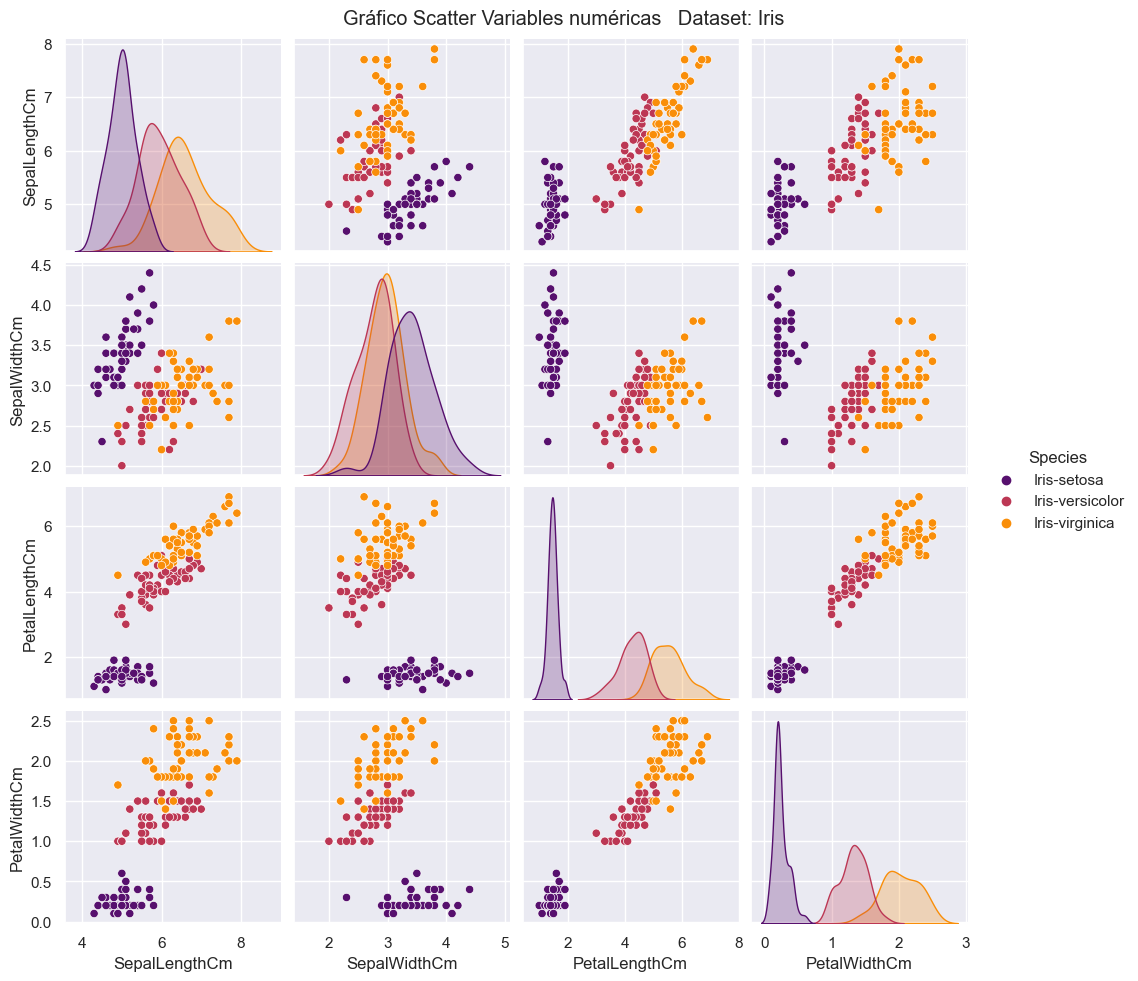

In [13]:
plt.figure(figsize=(40,10))  #definimos el grid de gráficos asi como tamaño

sns.pairplot(iris,hue='Species',palette='inferno')                         #graficaremos todas las variables numéricas y asignaremos un hue por categoría
plt.suptitle("Gráfico Scatter Variables numéricas   Dataset: Iris")

plt.subplots_adjust(top=.95)

plt.show()

Este gráfico nos da las relaciones lineales que hay entre las variables numéricas, se optó por poner un grid con todas las relaciones numéricas derivado que solo se tienen 4 de estas, por lo que su visualizción es sencilla, adicional a esto se asignó la distribución de las variables en la diagonal asi como una segmentación de color por categoría , con lo que podemos ver todas las combinaciones lineales asi como sus grupos dentro de estas.
Este gráfico nos ayuda a ver la correcta separacion de los grupos para algunas variables como el ancho vs largo del petalo, el ancho del sepalo vs el ancho del petalo asi como  el ancho del petalo vs el largo del petalo.
Otro punto importante es que muestra la alta correlación que hay entre las variables, sobre todo en el Largo vs ancho del petalo, la longitud del petalo vs longitud del sepalo asi como el ancho del petalo vs el largo del sepalo. 
Finalmente las distribuciones nos ayudan a visualizar las semejanzas entre algunas variables como el ancho del sepalo que parece ser muy similar para las 3 categorias.

####  <font color="grey">Violin plot</font>

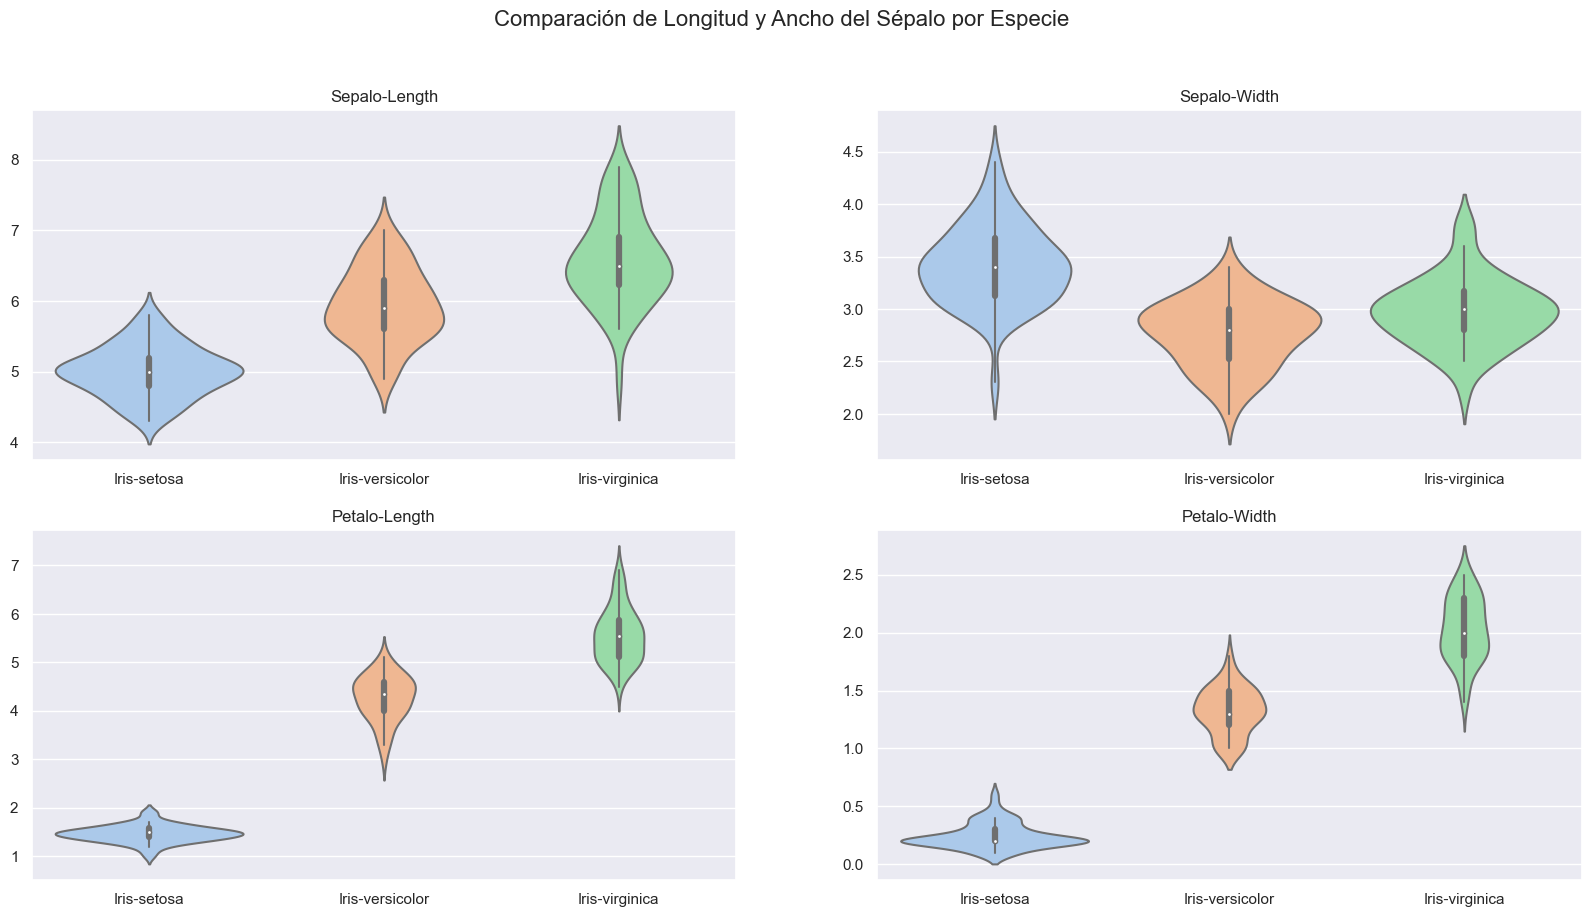

In [14]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) #definimos el grid de gráficos asi como tamaño

# violinplot 1
sns.violinplot(data=iris, x="Species", y="SepalLengthCm", palette="pastel",linewidth=1.5,fliersize=8, ax=axes[0, 0])

axes[0, 0].set_title('Sepalo-Length')
axes[0, 0].set_ylabel('')
axes[0, 0].set_xlabel('')


# violinplot 2
sns.violinplot(data=iris, x="Species", y="SepalWidthCm", palette="pastel",linewidth=1.5, fliersize=8, ax=axes[0, 1])

axes[0, 1].set_title('Sepalo-Width')
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('')

# violinplot 3
sns.violinplot(data=iris, x="Species", y="PetalLengthCm", palette="pastel",linewidth=1.5, fliersize=8, ax=axes[1, 0])

axes[1, 0].set_title('Petalo-Length')
axes[1, 0].set_ylabel('')
axes[1, 0].set_xlabel('')


# violinplot 4
sns.violinplot(data=iris, x="Species", y="PetalWidthCm", palette="pastel",linewidth=1.5, fliersize=8, ax=axes[1, 1])

axes[1, 1].set_title('Petalo-Width')
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('')


# Agregar título al gráfico múltiple
fig.suptitle('Comparación de Longitud y Ancho del Sépalo por Especie', fontsize=16)

plt.show()

El gráfico anterior fue segmentado por especie como valor categórico y subdividido en un grid que muestra por filas los petalos y los sepalos. Adicional a esto se divide con colores cada tipo de planta para diferenciar por gráfico pero para relacionar entre gráficos.
En el plot se presentan las distribuciones de las variables numéricas por categoria asi como la densidad de población acorde al ancho del violín, con lo que podemos ver discrepancias claras entre grupos, asi como una alta variabilidad principalmente en las variables de sepalo.
otro punto importante es la forma de las distribuciones pues parece que para las variables numéricas de tipo sepalo, los datos estan mas centrados en el orígen, mientras que para los sepalos los datos parecen estar más distribuidos o con una mayor varianza.
Final,ente este gráfico nos permite diferenciar las diferencias en escalas.

####  <font color="grey">Curva de Andrews</font>

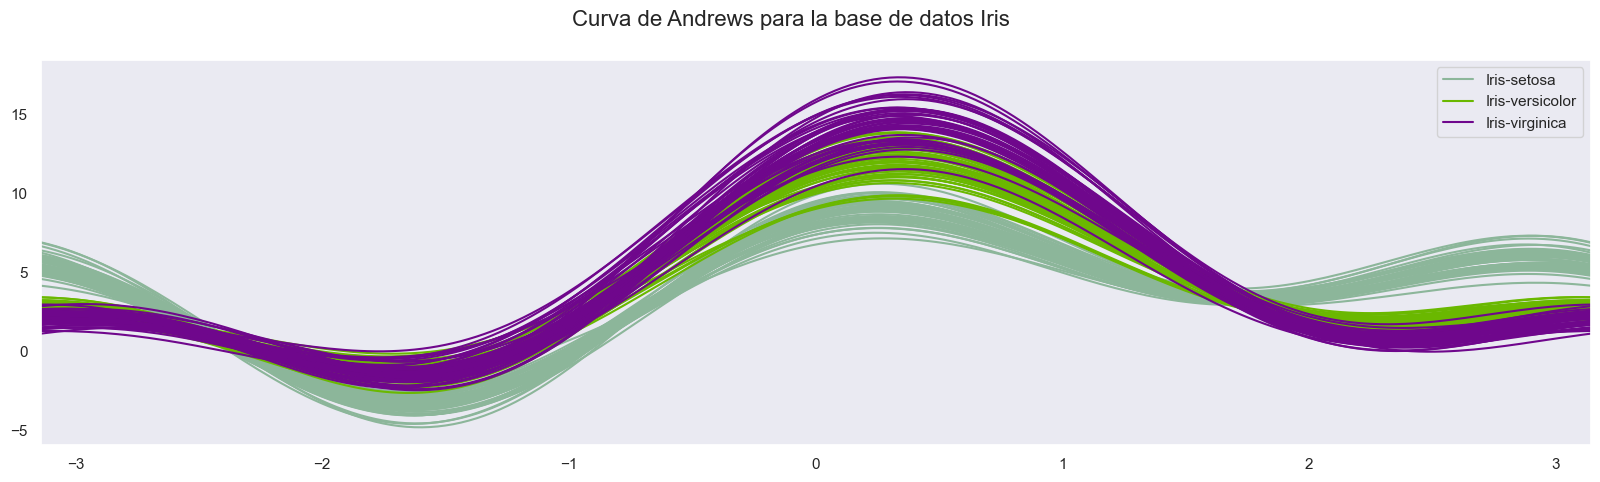

In [15]:
plt.figure(figsize=(20,5))

# Creamos la curva de Andrews
x = pd.plotting.andrews_curves(iris.iloc[:,1:], 'Species')
  

# graficamos curva
x.plot()

# Agregamos título al gráfico 
plt.suptitle('Curva de Andrews para la base de datos Iris', fontsize=16)

  
# Display
plt.show()

La curva de Andrews es una representación que nos permite ver nuestros datos combinados respecto a las categorías de estos para mostrarnos patrones introduciendolos en una función senoidal, como podemos ver la segmentación por colores nos permite identificar si hay subgrupos claros y como los datos se separan a lo largo de las variables. Otro punto importante es la oscilasión de la curva lo cual nos representa una característica de mayor relevancia dentro del dataset.
Otra cosa importante es la similitud de variables, lo cual nos dice que para algunas es practicamente la misma cuando se sobreponen pero para otras  difiere totalmente, como se ven en el final de la cirva.
Con ello podemos ver que en efecto podemos usar alguna variable para segmentar asi como también podemos ver la presencia de alta colinealidad en otras.

##  <font color="#008080">Gráfico Multidimensional propuesta</font>
####  <font color="grey">Scatter Plot multivariado</font>

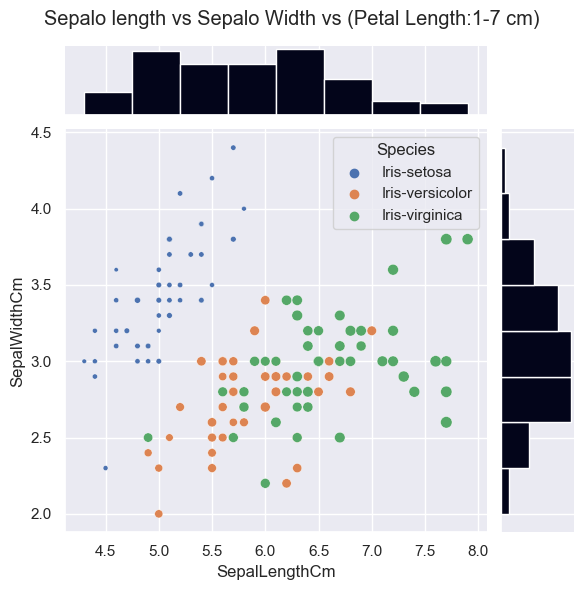

In [34]:
g = sns.JointGrid(data=iris, x="SepalLengthCm", y="SepalWidthCm")
g.plot_joint(sns.scatterplot,hue=iris.Species,s=iris.PetalLengthCm*10)
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=8)
plt.suptitle("Sepalo length vs Sepalo Width vs (Petal Length:1-7 cm)")
plt.subplots_adjust(top=.92)
plt.show()

Normalmente los scatter se usan para ver la relacion lineal entre dos variables, con un scatter multidimensional podemos representar 3 variables numericas y una categorica: x,y,tamaño asi como la segmentación por categoria, con lo que practicamente para este dataset se puede ver la mayoría de sus dimensiones y como interactuan.Adicional se presentan las distribuciones marginales con lo que tenemos mayor información sobre el dataset. Esto nos sirve para encontrar patrones en un ambiente en conjunto, asi como encontrar tendencias dentro de los clusters propuestos ademas de datnos el fundamento de comortamiento mediante si distribución marginal.


##  <font color="#008080">Discusión</font>

1. Boxplots:
Los boxplots, mediante la representación gráfica de la distribución de las variables fundamentales en el conjunto de datos iris, facilitan la apreciación visual de la variabilidad y la identificación de posibles valores atípicos en las dimensiones de longitud y ancho de los sépalos y pétalos. El análisis revela una mayor dispersión en las longitudes de los sépalos en comparación con las anchuras, lo que sugiere una variabilidad significativa en esta característica específica.

2. Scatterplots:
La creación de scatterplots posibilita la exploración de las relaciones entre las diferentes características del iris, presentando una representación gráfica de las relaciones bivariadas. La observación de estas relaciones revela, por ejemplo, una clara relación positiva entre la longitud y el ancho del pétalo, indicando una asociación positiva y proporcionando información sobre la posible interdependencia de estas características.

3. Violinplots:
Los violinplots, al combinar la información de los boxplots con las estimaciones de densidad, ofrecen una representación detallada de la distribución de las características del conjunto de datos. Dichos gráficos permiten visualizar la forma de la distribución y su simetría, destacando de manera efectiva la distribución bimodal de la longitud del pétalo en el conjunto de datos iris, lo que sugiere la presencia de distintas especies.

4. Histogramas:
Los histogramas proporcionan una visualización eficaz de la frecuencia de ocurrencia de los valores en cada característica, permitiendo una apreciación más profunda de las diferentes distribuciones. La observación de los histogramas en el conjunto de datos iris destaca, por ejemplo, la presencia de dos picos distintos en la longitud del pétalo, fortaleciendo la hipótesis de la existencia de múltiples especies en el conjunto de datos.

5. Curvas de Andrews:
Las curvas de Andrews, al ser una técnica de visualización única, permiten representar patrones en datos multivariados. En este set particular,iris, estas curvas resaltan las diferencias en la forma de las distribuciones entre las tres especies. La divergencia en los patrones de las curvas facilita la identificación y comparación de las especies, aportando una perspectiva valiosa a la interpretación de la complejidad del conjunto de datos.

En resumen, la utilización de estas visualizaciones estadísticas ofrece una comprensión holística de la estructura y las relaciones presentes en el conjunto de datos iris. Estas herramientas son esenciales para explorar, interpretar y comunicar de manera efectiva la información derivada de los datos, contribuyendo significativamente al análisis estadístico y la comprensión de la variabilidad en el conjunto de datos estudiado.

##  <font color="#008080">Conclusión</font>

Como se observó en un inicio el dataset iris muestra los datos de mediciones para 3 especies de plantas iris respecto al ancho y largo de sus sepalos y petalos. Estos datos nos dan un punto de partida dependiento del fin para el que vaya a ser utilizada la base, por lo que entenderla y explorarla nos dará los insigths necesarios para ya sea predecir, agrupar o simplemente describir los datos.  
Para ello un análisis estadístico permitiría conocer el comportamiento principal de las variables, comportamiento que no es tan evidente sin un analisis gráfico.  
Los métodos gráficos se fundamentan de los estadisticos convencionales brindandonos una potente herramienta para poder sustentar cualquier análisis o modelo. Si bien no hay una receta para hacer una análisis exploratorio conocer los principales gráficos nos darán un buen punto de partida para comprender los datos y los patrones de estos. En este trabajo se analizarón 5 tipos de gráficos centrales y uno propuesto fundamentandonos en los principios gestales para representar la información , con lo que se debería comprender qué se quiere explicar en cada grafíco asi como los puntos a destacar dentro de cada uno, remarcando grupos y variables importantes.  
Cabe destacar que cada tipo de gráfico tiene propositos diferentes, con lo que combinandolos se logra no solo entender el comportamiento de las variables y sus distribuciones, si no las relaciones intrinsecas entre ellas con lo que se comprendió de manera general el data set iris mostrando fuertes correlaciones entre algunas variables, subgrupos, asi como la variabilidad y tendencia de los datos. Como puntos siguientes, esta información nos podrá ayudar para eliminar variables, seleccionar modelos, o limpiar la información con el fin de un mejor desempeño de algun algoritmo.

##  <font color="#008080">Referencias</font>

* Anderson, E. R., & Fisher, R. A. (1936). Iris Dataset. Kaggle. https://www.kaggle.com/uciml/iris
Applied multivariable data statistical analysis
* Barroco E.E, (2024), Applied multivariable data statistical analysis. Maestría en ciencia de los datos

# Part II Exercises: Numerical examples

#### 1.- Let X and Y be two random variables, denoting age and weight, respectively. Consider a random sample of size n= 20 from these two variables:

#### X =(69,74,68, 70, 72, 67,66,70,76,68, 72, 79, 74,67,66,71,74, 75, 75, 76)
#### Y =(153,175,155, 135, 172, 150, 115, 137,200,130,140,265,185,112, 140, 150, 165, 185,210,220)

##### (a) Find the mean, median, and mode for X.

#### Mean
El cálculo matematico para el promedio esta dado por: 
 
$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$  ó


$\bar{x} = \frac{1}{n-1} \sum_{i=1}^{n} x_i$ si es una muestra

In [17]:
#Mean 

x=( 69 + 74 + 68 + 70 + 72 + 67 + 66 + 70 + 76 + 68+ 72 + 79 + 74 + 67 + 66 + 71 + 74 + 75 + 75 + 76)

mean = x / 20   #n  = 20

print(f"la media de x es {round(mean,2)}")

la media de x es 71.45


#### Mediana
El cálculo matematico para la mediana es  

$\text{Mediana} = 
\begin{cases} 
x_{(n+1)/2} & \text{si } n \text{ es impar} \\
\frac{x_{(n/2)} + x_{(n/2) + 1}}{2} & \text{si } n \text{ es par} 
\end{cases}$

Dentro de un arreglo ordenado

En nuesto caso como x es par usaremos la fórmula cuando es par

In [18]:
x = (66, 66, 67, 67, 68, 68, 69, 70, 70, 71, 72, 72, 74, 74, 74, 75, 75, 76, 76, 79)   #arreglo ordenado
n = 20    # tamaño del arreglo

# como es par necesitamos el valor del indice  10 y 11 los cuales son 71, 72

median = (71+72) /2

print(f"la mediana de x es {median}")

la mediana de x es 71.5


#### Moda

La moda es el valor o valores que aparecen con mayor frecuencia e un arreglo 

$\text{Moda} = \{x_i : \text{frecuencia de } x_i \text{ es máxima}\}$

In [19]:
# considerando lo anterior tenemos los siguientes conteos

# Valores unicos [66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 79])
#conteos         [2,   2,  2,  1,  2,  1,  2,  3,  2,  2,  1]

print(f"la moda de x es 74")

la moda de x es 74


#### mismos cálculos con numy

In [20]:
import numpy as np

In [21]:
x = np.array([69,74,68, 70, 72, 67,66,70,76,68, 72, 79, 74,67,66,71,74, 75, 75, 76])
y = np.array([153,175,155, 135, 172, 150, 115, 137,200,130,140,265,185,112, 140, 150, 165, 185,210,220])

In [22]:
# mean
print(f"La media es : {round(np.mean(x),3)}")


#median
print(f"La mediana es : {round(np.median(x),2)}")


#moda

# Calcula las frecuencias de cada valor
unique, counts = np.unique(x, return_counts=True)

# Encuentra el índice del valor con frecuencia máxima
max_index = np.argmax(counts)

# La moda será el valor correspondiente al índice encontrado
moda = unique[max_index]

print("La moda es:", moda)

La media es : 71.45
La mediana es : 71.5
La moda es: 74


#### (b) What is the variance for Y?  

La varianza es una medida estadística que representa la dispersión o variabilidad de un conjunto de datos respecto a su media. Se calcula como la media de los cuadrados de las diferencias entre cada dato y la media del conjunto. Una varianza mayor indica una mayor dispersión de los datos.

$var = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2$

In [23]:
#varianza
y = np.array([153,175,155, 135, 172, 150, 115, 137,200,130,140,265,185,112, 140, 150, 165, 185,210,220])

mean = np.mean(y)

acum = ((153-mean)**2 + (175-mean)**2 + (155-mean)**2 + (135-mean )**2 + (172-mean)**2 + (150-mean)**2 + (115-mean)**2 + (137-mean)**2 
        + (200-mean)**2 + (130-mean )**2 + (140-mean)**2 +(265-mean)**2 + (185-mean)**2 + (112-mean)**2 + (140-mean)**2 + (150-mean)**2 + (165-mean )**2 + (185-mean)**2 +(210-mean)**2 +(220-mean)**2)

vari= acum * (1/20)

print(f"la varianza de y es {vari}")

la varianza de y es 1369.21


In [24]:
#Calculo de numpy 


print(f"la varianza de y es {round(np.var(y),2)}")


la varianza de y es 1369.21


#### (c) Plot the normal distribution for X.

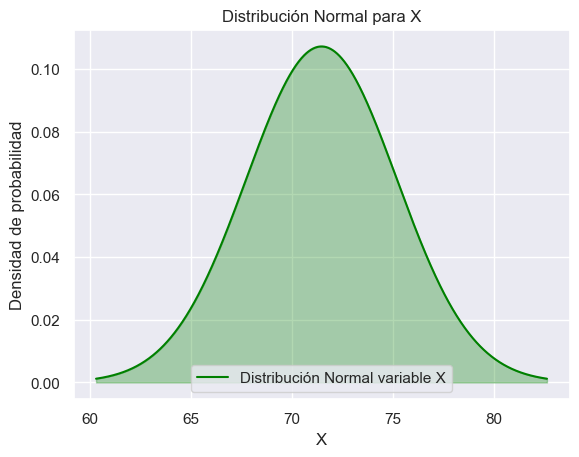

In [25]:
from scipy.stats import norm

x_1 = np.array([69,74,68, 70, 72, 67,66,70,76,68, 72, 79, 74,67,66,71,74, 75, 75, 76])

mu = np.mean(x_1)
sigma = np.std(x_1)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Crear el gráfico de la distribución normal con Seaborn
sns.lineplot(x, y, label='Distribución Normal variable X', color='green')

# Rellenar el área bajo la curva con color
plt.fill_between(x, y, color='green', alpha=0.3, label='')

# Configurar etiquetas y título
plt.xlabel('X')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Normal para X')

# Mostrar el gráfico
plt.legend()
plt.show()

#### (d) What is the probability of observing an age of 80 or higher?

Como queremos la probabilidad de observar una edad de 80 o mayor, necesitamos calcular la probabilidad acumulada al punto 80 y restarlo a 1  
$P(X\geq 80) = 1 -P(X\ < 80) $

In [26]:
# Calcular la CDF en el punto dado
cdf_valor = norm.cdf(80, mu, sigma)   

print(f'La probabilidad de observar un valor de 80 o mayor es es: {round(1 - cdf_valor,4)*100} %')

La probabilidad de observar un valor de 80 o mayor es es: 1.08 %


#### Plot the normal distribution for Y.

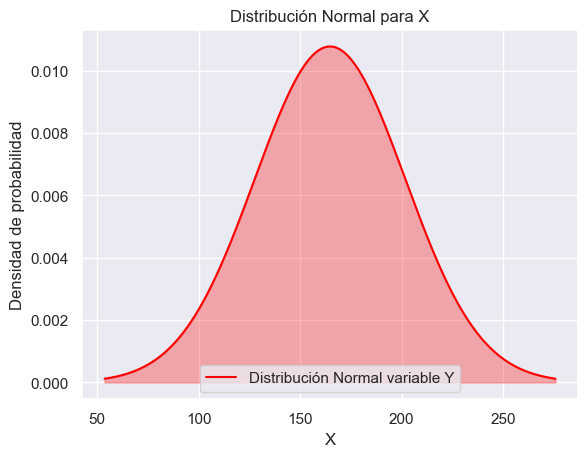

In [27]:
from scipy.stats import norm

y_1 = np.array([153,175,155, 135, 172, 150, 115, 137,200,130,140,265,185,112, 140, 150, 165, 185,210,220])

mu = np.mean(y_1)
sigma = np.std(y_1)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Crear el gráfico de la distribución normal con Seaborn
sns.lineplot(x, y, label='Distribución Normal variable Y', color='red')

# Rellenar el área bajo la curva con color
plt.fill_between(x, y, color='red', alpha=0.3, label='')

# Configurar etiquetas y título
plt.xlabel('X')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Normal para X')

# Mostrar el gráfico
plt.legend()
plt.show()

#### 2.- Respond “True or False” and provide a numerical example that provide support to the response:

##### (a) Mean is robust against outliers.

Falso: La media pondera los valores, lo cual hace que el impacto de magnitid sea mayor, por lo que si tenemos datos atípicos estos moverán nuestra media hacia ellos aunque no sean representativos o incluso sean errores de medición.

<AxesSubplot:>

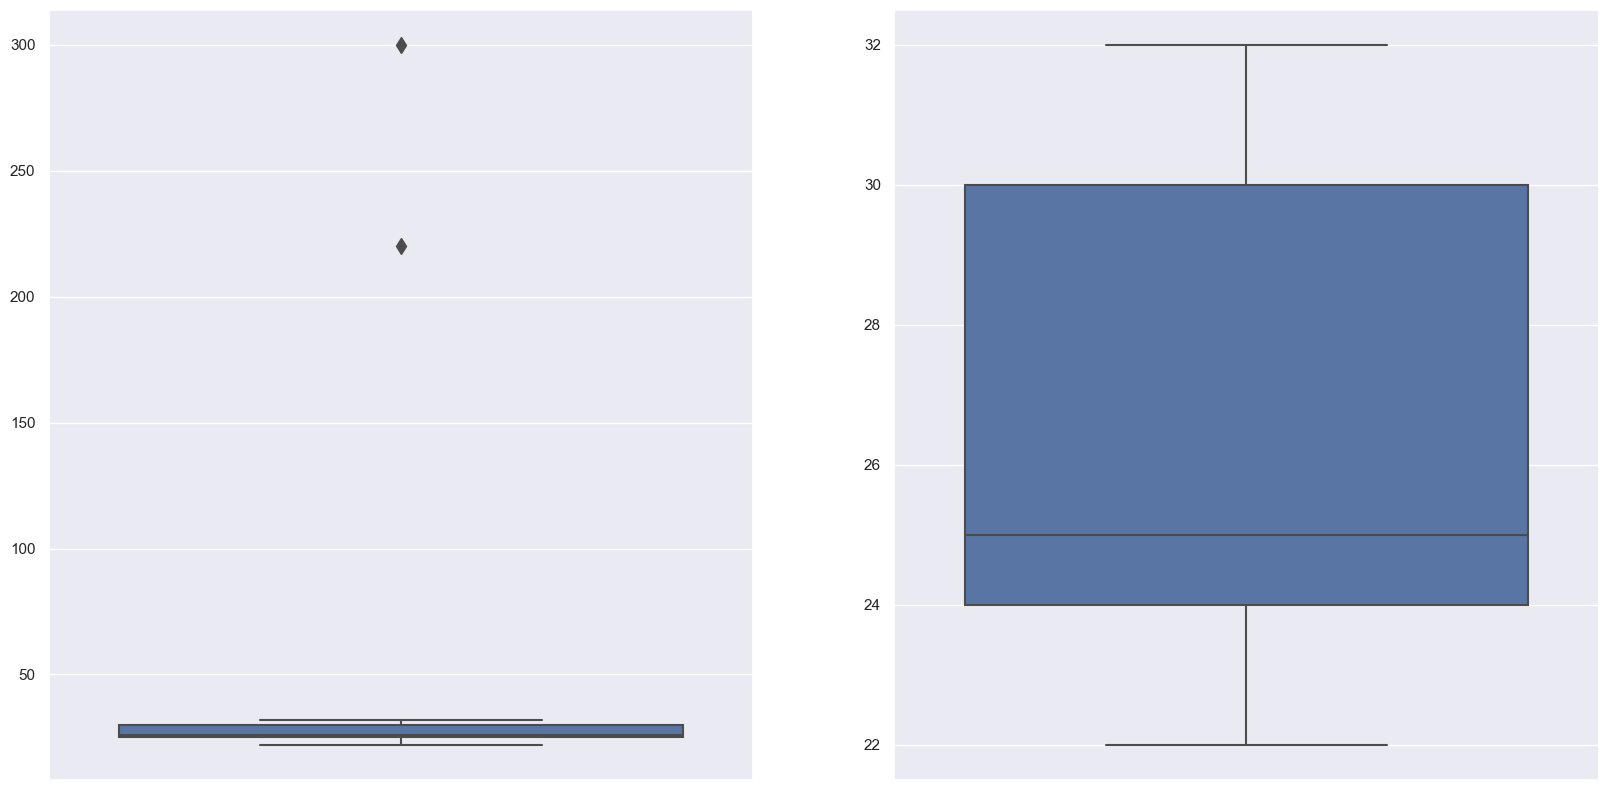

In [28]:
#####  Definimos un array de edades de estudiantes universitarios con dos outliers de errores

edades = np.array([22,25,26,28,30,32,24,26,25,31,30,24,23,25,25,220,300])       
edades_real = np.array([22,25,26,28,30,32,24,26,25,31,30,24,23,25,25,22,30])

# Boxplot 1

fig,axes= plt.subplots(ncols=2, figsize=(20, 10))

sns.boxplot( y=edades,linewidth=1.5,fliersize=8,ax=axes[0])
sns.boxplot( y=edades_real ,linewidth=1.5,fliersize=8,ax=axes[1])

In [29]:
print(f"Media de edades con outliers  { edades.mean()}")

print(f"Media de edades sin outliers  { edades_real.mean()}")

Media de edades con outliers  53.88235294117647
Media de edades sin outliers  26.352941176470587


Como podemos ver en nuestro ejemplo numérico, con solo agregar dos outliers provenientes de errores de medicion , estos desvian nuestra media de 27.5 a 53.5 lo que es un impacto considerable en terminos de exactitud.

#### (b) Median is robust against outliers.

Verdadero: la media al ordenar los datos y usar por posición a estos hace que la magnitud no sea la de relevancia si no la cantidad de datos ordenados , por lo que lo outliers no representan un impacto siempre y cuando su número sea pequeño detro de la muestra.

In [30]:
#####  Definimos un array de edades de estudiantes universitarios con dos outliers de errores

edades = np.array([22,25,26,28,30,32,24,26,25,31,30,24,23,25,25,220,300])
edades_real = np.array([22,25,26,28,30,32,24,26,25,31,30,24,23,25,25,22,30])



In [31]:
print(f"Mediana de edades con outliers  { np.median(edades)}")

print(f"Mediana de edades sin outliers  { np.median(edades_real)}")

Mediana de edades con outliers  26.0
Mediana de edades sin outliers  25.0


El ejemplo anterior nos muestra como pese a los dos datos atípicos, la mediana se mantiene cercana a nuestra mediana sin outliers, por lo que tiene menos impacto y su uso se hace mas robustos ante estos casos, siendo un estadístico consistente.

#### (c) Standard deviation is robust against outliers.

Falso: La desviación estándar no es un estadístico robusto contra outliers pues es sensible a dichos valores ya que su cálculo depende directamente de la varianza la cual a su vez se centra en la distancia hacia la media asi como un factor de crecimiento cuadrático que da mas impacto a datos  alejados. Un solo valor extremo puede tener un impacto significativo en la desviación estándar y distorsionar su interpretación.

In [32]:
#####  Dcontinuando con el array de edades de estudiantes universitarios con dos outliers de errores

edades = np.array([22,25,26,28,30,32,24,26,25,31,30,24,23,25,25,220,300])
edades_real = np.array([22,25,26,28,30,32,24,26,25,31,30,24,23,25,25,22,30])



In [33]:
print(f"desviacion de edades con outliers  { edades.std()}")
print(f"desviacion de edades sin outliers  { edades_real.std()}")

desviacion de edades con outliers  76.55438847292602
desviacion de edades sin outliers  3.1048572283286227


Finalmente con nuestro mismo ejemplo numérico podemos ver el impacto de los outliers dentro de nuestras desviaciones. El impacto  mayor que en estadísticos como la media pues como vimos se construye a partir de esta y un elemento cuadrático, el cual le da mas importancia a los datos grandes.